In [1]:
%matplotlib notebook
import pylab as pl
import sys
sys.path.append('/home/epics/PycharmProjects/SAXS_Drive/')
from readData import *
from calc_cf import calc_cf
import os

<IPython.core.display.Javascript object>


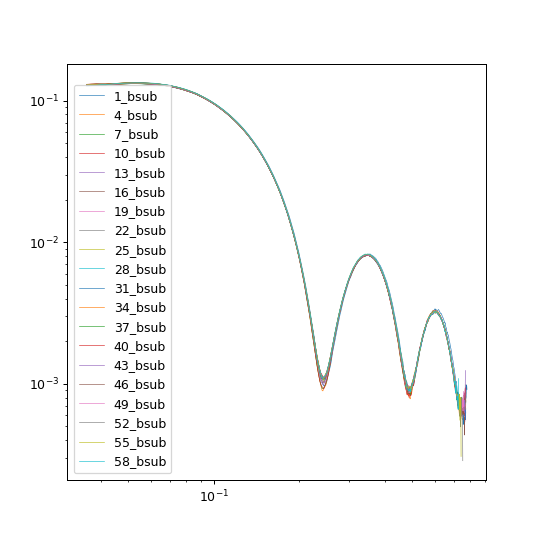

Averaged data saved in a file named /mnt/ChemData/Data/Asax/2018-11/Tianbo/Mo132_15mM_Rb_15mM_Na/pilatus_100k/extracted_pyFAI/Mean/Mo132_15mM_Rb_15mM_Na_2_mean.txt
Averaged data saved in a file named /mnt/ChemData/Data/Asax/2018-11/Tianbo/Mo132_15mM_Rb_15mM_Na/pilatus_100k/extracted_pyFAI/Mean/Mo132_15mM_Rb_15mM_Na_3_mean.txt
64.57831499569535
Averaged data saved in a file named /mnt/ChemData/Data/Asax/2018-11/Tianbo/Mo132_15mM_Rb_15mM_Na/pilatus_100k/extracted_pyFAI/Mean/Mo132_15mM_Rb_15mM_Na_1_mean.txt
/mnt/ChemData/Data/Asax/2018-11/Tianbo/Mo132_15mM_Rb_15mM_Na/pilatus_100k/extracted_pyFAI/Mean/Mo132_15mM_Rb_15mM_Na_1_mean.txt
Subtracted filname data save in a file named /mnt/ChemData/Data/Asax/2018-11/Tianbo/Mo132_15mM_Rb_15mM_Na/pilatus_100k/extracted_pyFAI/Mean/Bkg_sub/Mo132_15mM_Rb_15mM_Na_0001_bsub.txt
Averaged data saved in a file named /mnt/ChemData/Data/Asax/2018-11/Tianbo/Mo132_15mM_Rb_15mM_Na/pilatus_100k/extracted_pyFAI/Mean/Mo132_15mM_Rb_15mM_Na_5_mean.txt
Averaged data 

Averaged data saved in a file named /mnt/ChemData/Data/Asax/2018-11/Tianbo/Mo132_15mM_Rb_15mM_Na/pilatus_100k/extracted_pyFAI/Mean/Mo132_15mM_Rb_15mM_Na_35_mean.txt
Averaged data saved in a file named /mnt/ChemData/Data/Asax/2018-11/Tianbo/Mo132_15mM_Rb_15mM_Na/pilatus_100k/extracted_pyFAI/Mean/Mo132_15mM_Rb_15mM_Na_36_mean.txt
64.31628994135065
Averaged data saved in a file named /mnt/ChemData/Data/Asax/2018-11/Tianbo/Mo132_15mM_Rb_15mM_Na/pilatus_100k/extracted_pyFAI/Mean/Mo132_15mM_Rb_15mM_Na_34_mean.txt
/mnt/ChemData/Data/Asax/2018-11/Tianbo/Mo132_15mM_Rb_15mM_Na/pilatus_100k/extracted_pyFAI/Mean/Mo132_15mM_Rb_15mM_Na_34_mean.txt
Subtracted filname data save in a file named /mnt/ChemData/Data/Asax/2018-11/Tianbo/Mo132_15mM_Rb_15mM_Na/pilatus_100k/extracted_pyFAI/Mean/Bkg_sub/Mo132_15mM_Rb_15mM_Na_0034_bsub.txt
Averaged data saved in a file named /mnt/ChemData/Data/Asax/2018-11/Tianbo/Mo132_15mM_Rb_15mM_Na/pilatus_100k/extracted_pyFAI/Mean/Mo132_15mM_Rb_15mM_Na_38_mean.txt
Averaged 

In [3]:
fname='/mnt/ChemData/Data/Asax/2018-11/Tianbo/Mo132_15mM_Rb_15mM_Na/pilatus_100k/extracted_pyFAI/Mo132_15mM_Rb_15mM_Na'
Etimes=20
Ntimes=1
s_thickness=0.140*1.051  #thickness of sample in cms
b_thickness=0.140  #thickness of bg in cms
xmin=0.1
xmax=0.25
sam_num=1
bg_num=2
gc_num=3


fdir=os.path.dirname(fname)
mean_dir=os.path.join(fdir,'Mean')
ctimes=3*Ntimes
data={}


if not os.path.exists(mean_dir): 
    os.makedirs(os.path.join(fdir,'Mean'))

pl.figure(figsize=(6,6))
snames={}
bnames={}
gnames={}

for j in range(0,Etimes):
    #pl.subplot(311)
    
    #Calculating mean of bacgrounds
    fnum=[]
    for i in range(bg_num+ctimes*j,bg_num+ctimes*j+Ntimes):
        fnum.append(i)
        bnames[i]=fname+'%04d.txt'%i
    data,obname=average1DSAXS(fname,num=fnum,delete_prev=False,data=data,extra_key=fnum[0])
    #pl.plot(data[obname]['x'],data[obname]['y'],linewidth=0.5,label=str(fnum[0])+'_mean')
    
    #Calculating mean of GC
    fnum=[]
    for i in range(gc_num+ctimes*j,gc_num+ctimes*j+Ntimes):
        fnum.append(i)
        gnames[i]=fname+'%04d.txt'%i
    data,ogname=average1DSAXS(fname,num=fnum,delete_prev=False,data=data,extra_key=fnum[0])
    #pl.plot(data[ogname]['x'],data[ogname]['y'],linewidth=0.5,label=str(fnum[0])+'_mean')
    
    ene,cf,a,b=calc_cf(ogname,standard='GC',thickness=0.1055,xmin=xmin,xmax=xmax,interpolation_type='linear')
    print(cf)
    
    #Calculating mean of sample
    fnum=[]
    for i in range(sam_num+ctimes*j,sam_num+ctimes*j+Ntimes):
        fnum.append(i)
        snames[i]=fname+'%04d.txt'%i
    data,ofname=average1DSAXS(fname,num=fnum,delete_prev=False,data=data,extra_key=fnum[0])
    #pl.plot(data[ofname]['x'],data[ofname]['y'],linewidth=0.5,label=str(fnum[0])+'_mean')
    
    
    #Performing background subtraction
    obsname=os.path.basename(fname+'_%04d_bsub.txt'%fnum[0])
    
    
    #pl.subplot(312)
    print(ofname)
    data,bsfname=bkgSub1DSAXS(data,ofname,data,obname,obsname,thickness=s_thickness,cf=cf,bg_factor=s_thickness/b_thickness,norm=1.0)
    pl.plot(data[bsfname]['x'],data[bsfname]['CF']*data[bsfname]['y'],linewidth=0.5,label=str(fnum[0])+'_bsub')
    
    


pl.xscale('log')
pl.yscale('log')
leg=pl.legend(loc='best')
leg.draggable()


## Water background comparison

<IPython.core.display.Javascript object>


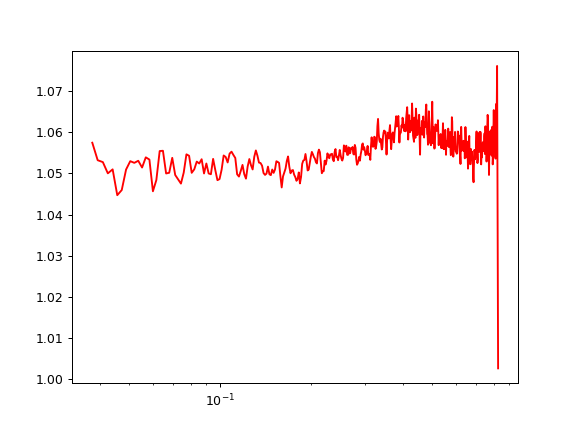

1.0509128007737345


In [9]:
fstube='/mnt/ChemData/Data/Asax/2018-11/Tianbo/water_sample_tube/\
pilatus_100k/extracted_pyFAI/bgsub/water_sample_tube_mean.txt'
bstube='/mnt/ChemData/Data/Asax/2018-11/Tianbo/water_bkg_tube/\
pilatus_100k/extracted_pyFAI/Mean/water_bkg_tube_mean.txt'
data=read1DSAXS(fstube,data={})
data=read1DSAXS(bstube,data=data)
pl.figure()
pl.plot(data[fstube]['x'],data[fstube]['y']/data[bstube]['y'],'r-')
#pl.plot(data[bstube]['x'],data[bstube]['y'],'g-')
pl.xscale('log')
#pl.yscale('log')
print(pl.mean((data[fstube]['y']/data[bstube]['y'])[100]))
